In [ ]:
#구글 마운트
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np

import os

np.random.seed(42)

In [ ]:
#이미지 불러오기
data = ('/content/drive/MyDrive/project4/Meta')
train = ('/content/drive/MyDrive/project4/Train')
test = ('/content/drive/MyDrive/project4/Test')

In [ ]:
#변수 설정
data_ = []
labels = []
classes = 43
cur_path = os.getcwd()

In [ ]:
#이미지 및 해당 레이블 불러오기
from PIL import Image
for i in range(classes):
    path = os.path.join(train, str(i))
    for img in os.listdir(path):
        try:
            img_path = os.path.join(path, img)
            img = Image.open(img_path)
            img = img.resize((32, 32))
            data_.append(np.array(img))
            labels.append(i)
        except:
            print('error')

In [ ]:
#목록을 numpy 배열로 변환
data_ = np.array(data_)
labels = np.array(labels)

In [ ]:
#데이터 분할 및 변환
from sklearn.model_selection import train_test_split

#shape 확인
print(data_.shape)
print(labels.shape)

(39209, 32, 32, 3)
(39209,)


In [ ]:
#훈련 및 테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(data_, labels, test_size=0.2, random_state=42)

In [ ]:
#분할 한 shape 확인
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(31367, 32, 32, 3)
(7842, 32, 32, 3)
(31367,)
(7842,)


In [ ]:
#레이블을 하나의 핫 인코딩으로 변환
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

In [ ]:
#모델 생성 및 컴파일
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout

# 모델 구축
model = Sequential()

# 첫번째 컨볼루션 레이어
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 두번째 컨볼루션 레이어
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 세번째 레이어
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(43, activation='softmax'))

# 모델 컴파일
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 모델 확인
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 conv2d_7 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 14, 14, 32)        0         
                                                                 
 conv2d_8 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 conv2d_9 (Conv2D)           (None, 10, 10, 64)        36928     
                                                      

In [ ]:
#모델훈련
model.fit(X_train, y_train, batch_size=32, epochs=10, validation_split=0.2)

Epoch 1/10
785/785 [==============================] - 92s 116ms/step - loss: 1.8248 - accuracy: 0.5502 - val_loss: 0.2566 - val_accuracy: 0.9471
Epoch 2/10
785/785 [==============================] - 91s 116ms/step - loss: 0.4337 - accuracy: 0.8728 - val_loss: 0.1440 - val_accuracy: 0.9657
Epoch 3/10
785/785 [==============================] - 91s 116ms/step - loss: 0.2711 - accuracy: 0.9211 - val_loss: 0.0876 - val_accuracy: 0.9735
Epoch 4/10
785/785 [==============================] - 90s 115ms/step - loss: 0.2045 - accuracy: 0.9410 - val_loss: 0.0665 - val_accuracy: 0.9852
Epoch 5/10
785/785 [==============================] - 92s 117ms/step - loss: 0.1990 - accuracy: 0.9439 - val_loss: 0.0417 - val_accuracy: 0.9909
Epoch 6/10
785/785 [==============================] - 94s 119ms/step - loss: 0.1430 - accuracy: 0.9599 - val_loss: 0.0469 - val_accuracy: 0.9892
Epoch 7/10
785/785 [==============================] - 93s 118ms/step - loss: 0.1610 - accuracy: 0.9570 - val_loss: 0.0582 - val_ac

In [ ]:
#테스트 데이터 정확도 확인
score = model.evaluate(X_test, y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

246/246 [==============================] - 7s 28ms/step - loss: 0.0377 - accuracy: 0.9908
Test loss: 0.03774761036038399
Test accuracy: 0.9908186793327332


In [ ]:
#Chance Level 예측 0.02이상
from sklearn.metrics import classification_report

predictions = model.predict(X_test)
print(classification_report(y_test.argmax(axis=1),
                            predictions.argmax(axis=1),
                            target_names=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', 
                                          '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', 
                                          '33', '34', '35', '36', '37', '38', '39', '40', '41', '42']))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96        38
           1       0.99      0.97      0.98       496
           2       0.97      0.99      0.98       450
           3       1.00      0.99      0.99       280
           4       0.98      0.99      0.99       418
           5       0.99      0.98      0.98       364
           6       1.00      1.00      1.00        59
           7       0.99      0.98      0.99       278
           8       0.99      1.00      0.99       301
           9       0.99      1.00      0.99       268
          10       0.99      1.00      1.00       370
          11       1.00      0.98      0.99       236
          12       1.00      1.00      1.00       450
          13       1.00      1.00      1.00       452
          14       1.00      1.00      1.00       162
          15       1.00      1.00      1.00       120
          16       1.00      1.00      1.00        90
          17       1.00    

In [ ]:
#CV를 통한 일반화 가능성 확인 K-Fold Cross Validation
from sklearn.model_selection import KFold


kfold = KFold(n_splits=2, shuffle=True, random_state=42)
results = []
for train, test in kfold.split(X_train):
    model.fit(X_train[train], y_train[train])
    results.append(model.evaluate(X_train[test], y_train[test]))


print(results)

491/491 [==============================] - 13s 27ms/step - loss: 0.0154 - accuracy: 0.9954
[[0.010817347094416618, 0.9962382316589355], [0.015414888970553875, 0.9954090118408203]]


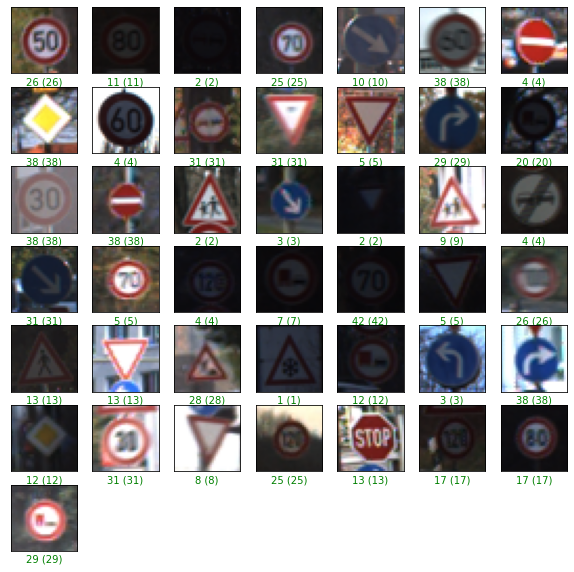

In [ ]:
#분류 모델 시각화 하기
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
start_index = 0
for i in range(43):
    plt.subplot(7, 7, i + 1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    prediction = model.predict(X_test[start_index:start_index + 1])
    plt.imshow(X_test[start_index].reshape(32, 32, 3), cmap=plt.cm.binary)
    plt.xlabel(np.argmax(prediction[0]))
    start_index += 10
    actual = y_test[start_index - 10:start_index]
    col = 'g'
    if np.argmax(prediction) != np.argmax(actual):
        col = 'r'
    plt.imshow(X_test[start_index].reshape(32, 32, 3), cmap=plt.cm.binary)
    plt.xlabel('{} ({})'.format(np.argmax(actual), np.argmax(prediction)), color=col)
    start_index += 10
plt.show()